<a href="https://colab.research.google.com/github/hohuqu/HackDiversityDataInterviewChallenge/blob/main/Product_Inclusion_Analysis_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.core.display import display, HTML

# 1. Retrieve and Inspect the Dataset

In [ ]:
#Check if data is mounted
!ls


inclusive_features_usage.xlsx


In [ ]:
pd.ExcelFile("./inclusive_features_usage.xlsx").sheet_names

['inclusive_features_usage_split_']

The file given is an .xlsx file instead of a CSV file. But, there is only 1 sheet in the file. So it is safe to convert to CSV. If the Excel sheet had multiple sheets, then I would have to be a little careful in converting the sheets into dataframes.

In [ ]:
init_df = pd.DataFrame(pd.read_excel("./inclusive_features_usage.xlsx"))
init_df_conversion=pd.read_excel("./inclusive_features_usage.xlsx")
init_df_conversion.to_csv("./inclusive_features_usage.xlsx", index=False)

In [ ]:
#Check to see if both methods generate same dataframe
comp = init_df == init_df_conversion
# Counts of True and False per column
true_counts = comp.sum()
false_counts = (~comp).sum()
comparison_summary = pd.DataFrame({
    "True Count": true_counts,
    "False Count": false_counts
})

# Summary
display(HTML(comp.head(10)._repr_html_())) #HTML format to make table look nicer
print(comparison_summary)

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True,False
6,True,True,True,True,True,True,False,True
7,True,True,True,True,True,True,False,True
8,True,True,True,True,True,True,False,True
9,True,True,True,True,True,True,False,True


                        True Count  False Count
user_id                      10000            0
feature_used                 10000            0
session_duration             10000            0
engagement_score             10000            0
accessibility_settings       10000            0
age_group                    10000            0
gender                        6003         3997
additional_attributes         3997         6003


In [ ]:
display(HTML("<h3>init_df (First 10 Rows)</h3>"))
display(HTML(init_df.head(10)._repr_html_())) #HTML formatting to allow tables to look nicer

display(HTML("<h3>init_df_conversion (First 10 Rows)</h3>"))
display(HTML(init_df_conversion.head(10)._repr_html_())) #HTML formatting to allow tables to look nicer




,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN
5,user_8101,High Contrast Mode,20.72,4,0,Adult,Male,NaN
6,user_5356,Text-to-Speech,26.34,1,2,Senior,NaN,Person of Color
7,user_8515,Text-to-Speech,93.82,4,5,Teenager,NaN,Person of Color
8,user_6496,Text-to-Speech,32.02,3,4,Professional,NaN,Person of Color
9,user_3568,Colorblind Mode,90.63,4,3,Senior,NaN,LGBTQ+


,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN
5,user_8101,High Contrast Mode,20.72,4,0,Adult,Male,NaN
6,user_5356,Text-to-Speech,26.34,1,2,Senior,NaN,Person of Color
7,user_8515,Text-to-Speech,93.82,4,5,Teenager,NaN,Person of Color
8,user_6496,Text-to-Speech,32.02,3,4,Professional,NaN,Person of Color
9,user_3568,Colorblind Mode,90.63,4,3,Senior,NaN,LGBTQ+


The == is treating 2 NaN values as false because their actual meanings are unknown. Pandas/NumPy treats the comparison as False to avoid incorrectly assuming they represent the same missing value. However, the NaN values arise from missing data, so we can assume the NaN values of the 2 dataframes are the same.

In [ ]:
comp = (init_df == init_df_conversion) | (init_df.isna() & init_df_conversion.isna()) #isna() checks if both positions are NaN and treats them as True if they are
# Count True and False values per column
true_counts = comp.sum()
false_counts = (~comp).sum()
comparison_summary = pd.DataFrame({
    "True Count": true_counts,
    "False Count": false_counts
})

# Summary
display(HTML(comp.head(10)._repr_html_()))
print(comparison_summary)

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True


                        True Count  False Count
user_id                      10000            0
feature_used                 10000            0
session_duration             10000            0
engagement_score             10000            0
accessibility_settings       10000            0
age_group                    10000            0
gender                       10000            0
additional_attributes        10000            0


In [ ]:
column_headers = init_df.columns.tolist()

print("Unique values and count of each column\n")
unique_values_per_column = {col: init_df[col].unique() for col in init_df.columns}
for column, unique_values in unique_values_per_column.items():
    # Count unique values excluding NaN
    unique_count = init_df[column].nunique()
    print(f"\033[1m{column}\033[0m")
    print(f"{unique_values}\n Count (excluding NaN): {unique_count}\n")
    #print(f"Count (excluding NaN): {unique_count}\n")


Unique values and count of each column

user_id
['user_4737' 'user_1492' 'user_5936' ... 'user_9099' 'user_667'
 'user_7722']
 Count (excluding NaN): 6358

feature_used
['Multilingual' 'Text-to-Speech' 'Colorblind Mode' 'High Contrast Mode'
 'Visual Aid']
 Count (excluding NaN): 5

session_duration
[60.77 20.2  93.78 ... 90.86 19.23 92.66]
 Count (excluding NaN): 6701

engagement_score
[4 5 2 3 1]
 Count (excluding NaN): 5

accessibility_settings
[4 2 1 0 5 3]
 Count (excluding NaN): 6

age_group
['Teenager' 'Professional' 'Adult' 'Young Adult' 'Senior']
 Count (excluding NaN): 5

gender
[nan 'Non-Binary' 'Female' 'Male']
 Count (excluding NaN): 3

additional_attributes
['LGBTQ+' nan 'Person of Color']
 Count (excluding NaN): 2



**Unique Count of values using Excel**
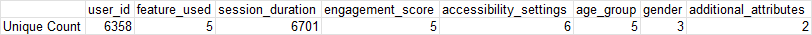

These unique value counts were confirmed on Excel using the functions (assuming I have not made any changes to the data yet):

=SUMPRODUCT((A2:A10001<>"")/COUNTIF(A2:A10001, A2:A10001&"")) to count unique values in column **user_id**,

=SUMPRODUCT((B2:B10001<>"")/COUNTIF(B2:B10001, B2:B10001&"")) to count unique values in column **feature_used**,

=SUMPRODUCT((C2:C10001<>"")/COUNTIF(C2:C10001, C2:C10001&"")) to count unique values in column **session_duration**,

=SUMPRODUCT((D2:D10001<>"")/COUNTIF(D2:D10001, D2:D10001&"")) to count unique values in column **engagement_score**,

=SUMPRODUCT((E2:E10001<>"")/COUNTIF(E2:E10001, E2:E10001&"")) to count unique values in column **accessibility_settings**,

=SUMPRODUCT((F2:F10001<>"")/COUNTIF(F2:F10001, F2:F10001&"")) to count unique values in **column age_group**,

=SUMPRODUCT((G2:G10001<>"")/COUNTIF(G2:G10001, G2:G10001&"")) to count unique values in column **gender**, and

=SUMPRODUCT((H2:H10001<>"")/COUNTIF(H2:H10001, H2:H10001&"")) to count unique values in column **additional_attributes**.

